# Comparison of criteria between the impulsive and the continuous model with exogenous mortality on pests

The aim is to compare the efficiency of two different models (continuous and impulsive) with exogenous mortality on pests $x$.  
The main criteria of comparison is the time for $x$ to reach an $\epsilon$ value starting from the same value. We want to see how does it variate with respect to $T$ (the time period) and $t_{pulse}$ (the time of the first exogenous mortality event).

In [1]:
#Import librairies
import numpy as np
import matplotlib.pyplot as plt

#Import the module and make it reload each time there is a change 
import importlib
import double_exo
importlib.reload(double_exo)

<module 'double_exo' from '/run/netsop/u/home-sam/home/aloyens/Internship_CACOLAC/sim_models/First_sim_CACOLAC/double_exo.py'>

#### Reminder of the general model

\begin{cases}
\dot{x} = g(x)x - f(x,y)y\\ 
\dot{y} = \gamma f(x,y) y - m(x,y)y\\
x(nT^{+}) = x(nT) - E_xh_x(x(nT))\\
y(nT^{+}) = y(nT) - E_yh_y(y(nT))\\
\end{cases} 

In [2]:
#Fixed parameters
r = 0.5
K = 10 
a = 0.1
m = 0.1
gamma = 0.8

E_inf = r - 0.1 # E < r
E_sup = r + 0.1 # E > r
T = 5

t_0 = 0
t_n = 100

tt = 1 #just to not have a missing argument t when we solve models

# 1 Presence of pests $x$ only

#### Continuous model

\begin{cases}
\dot{x} = [r(1-\frac{x}{K})y- E_x]x- f(x,y) \times y\\ 
\dot{y} = \gamma f(x,y)\times y - m(x,y) \times y\\
x(nT^{+}) = x(nT) - E_x \times 0\\
y(nT^{+}) = y(nT) - E_y \times 0\\
\end{cases}  
with $y_0 = 0$

#### Impulsive model

\begin{cases}
    \dot{x} = [r(1-\frac{x}{K})y- E_x]x- f(x,y) \times y\\ 
    \dot{y} = \gamma f(x,y)\times y - m(x,y) \times y\\
    x(nT^{+}) = x(nT) - (1 - e^{-E_xT})x(nT)\\
    y(nT^{+}) = y(nT) - E_y \times 0
\end{cases}
with $y_0 = 0$

$y_0 = 0$ makes that for any functions $f$ and $m$, $y$ stays at $0$

Periodic solution and equilibrium

In [3]:
#Inital value of the periodic solution
E_tilde = 1 - np.exp(-E_inf*T)
x_p_0 = ( ( np.exp(r*T) * (1 - E_tilde) - 1 ) * K ) / ( np.exp(r*T) - 1 )

#Inital value of the equilibrium
x_star = K * (1 - E_inf/r)

## 1.1 Plot the populations and get the values of the criteria

### 1.1.1 Periodic solution and equilibrium with first pulse at $t=T$

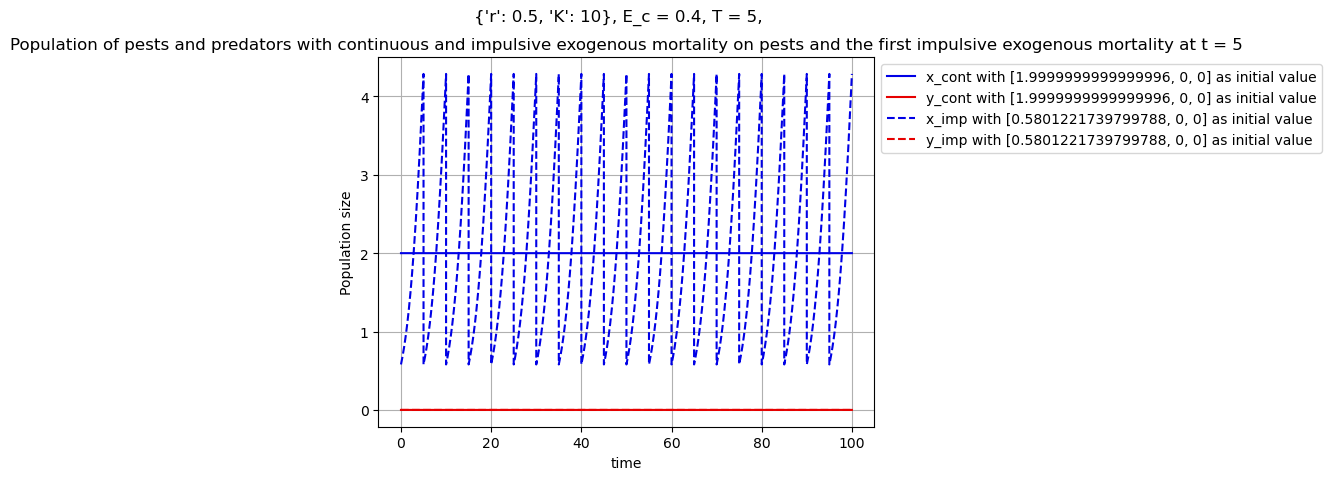

{'T': 5,
 'I_cont_final': 199.99999999999991,
 'I_imp_final': 200.00001868475857,
 'eps': 0.01,
 't_pulse': 5,
 't_eta_cont': None,
 't_eta_imp': None}

In [4]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp = [x_p_0,0,0],
    xyI0_cont = [x_star,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_inf,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=T,
    eps=0.01,
    plot_population=True
)

### 1.1.2 Time to reach $\epsilon$ starting from the same initial value

We want to do the comparison at the "worst possible case" which is $x_0 = K$

To have eradication, we always set $E_c > r$

First exogenous mortality event at $ t=T $

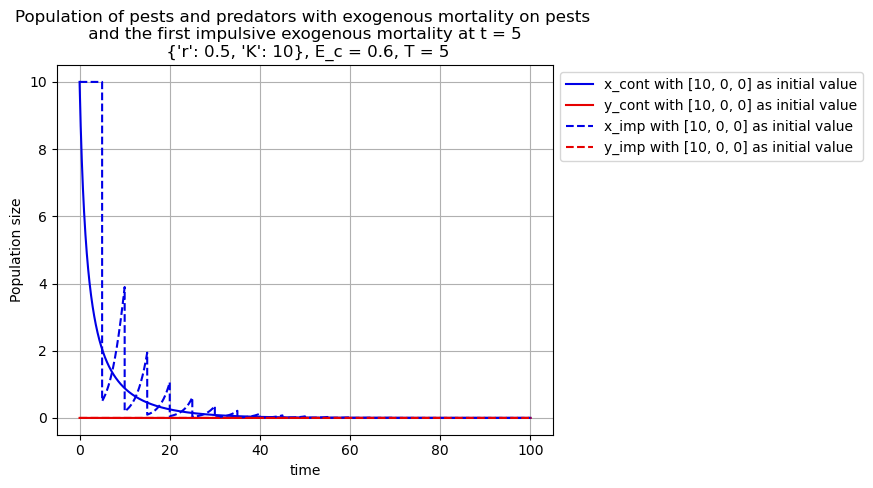

{'T': 5,
 'I_cont_final': 35.83443279398012,
 'I_imp_final': 67.63280876199002,
 'eps': 0.01,
 't_pulse': 5,
 't_eta_cont': 51.25,
 't_eta_imp': 65.0,
 't_eta_imp - t_eta_cont': 13.75}

In [4]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp= [K,0,0],
    xyI0_cont= [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=T,
    eps=0.01,
    plot_population=True
)

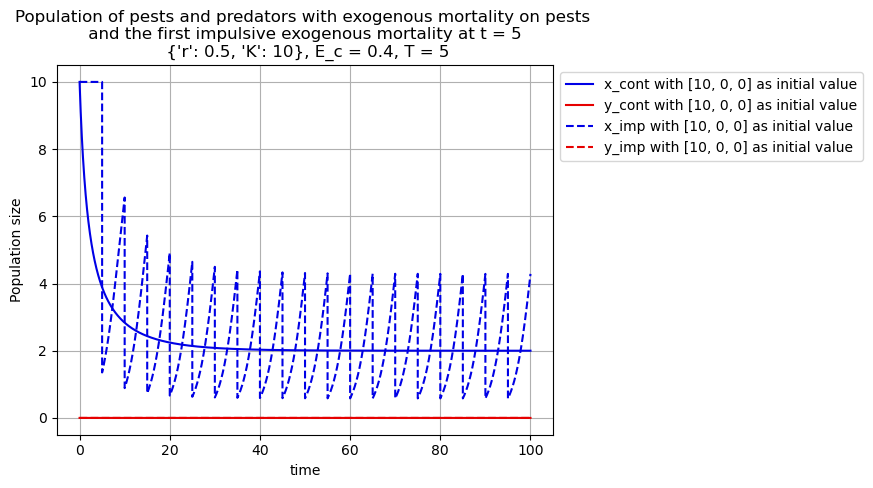

{'T': 5,
 'I_cont_final': 232.18803190489487,
 'I_imp_final': 256.9411847096145,
 'eps': 0.01,
 't_pulse': 5,
 't_eta_cont': None,
 't_eta_imp': None}

In [3]:
#Try with low E
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp= [K,0,0],
    xyI0_cont= [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_inf,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=T,
    eps=0.01,
    plot_population=True
)

First exogenous mortality event at $t=0$

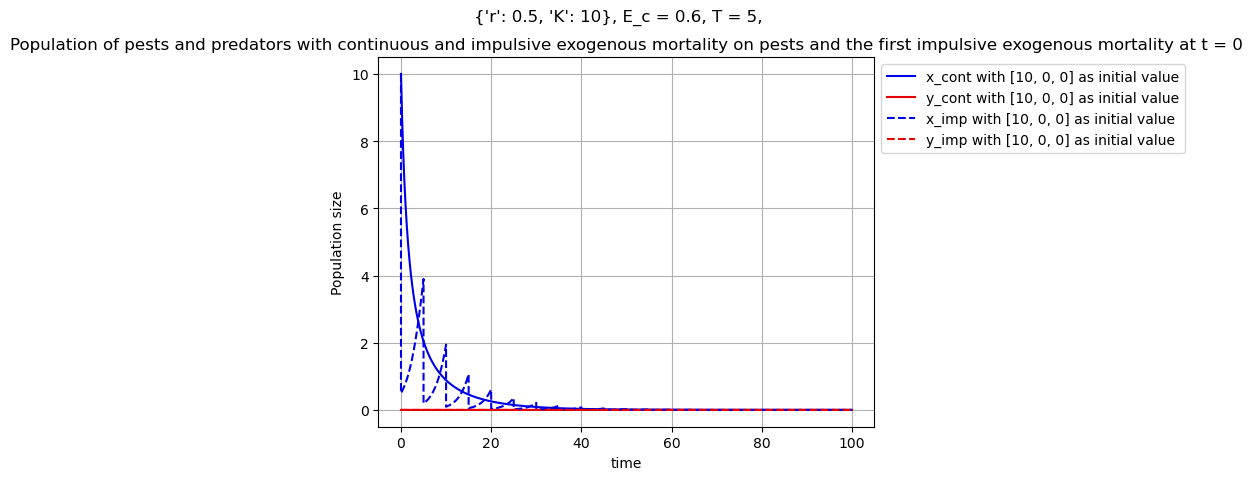

{'T': 5,
 'I_cont_final': 35.83443279398012,
 'I_imp_final': 17.633153662017758,
 'eps': 0.01,
 't_pulse': 0,
 't_eta_cont': 51.25,
 't_eta_imp': 60.0,
 't_eta_imp - t_eta_cont': 8.75}

In [6]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp= [K,0,0],
    xyI0_cont= [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=0,
    eps=0.01,
    plot_population=True
)

First exogenous mortality event at $t=2.5$ (for example)

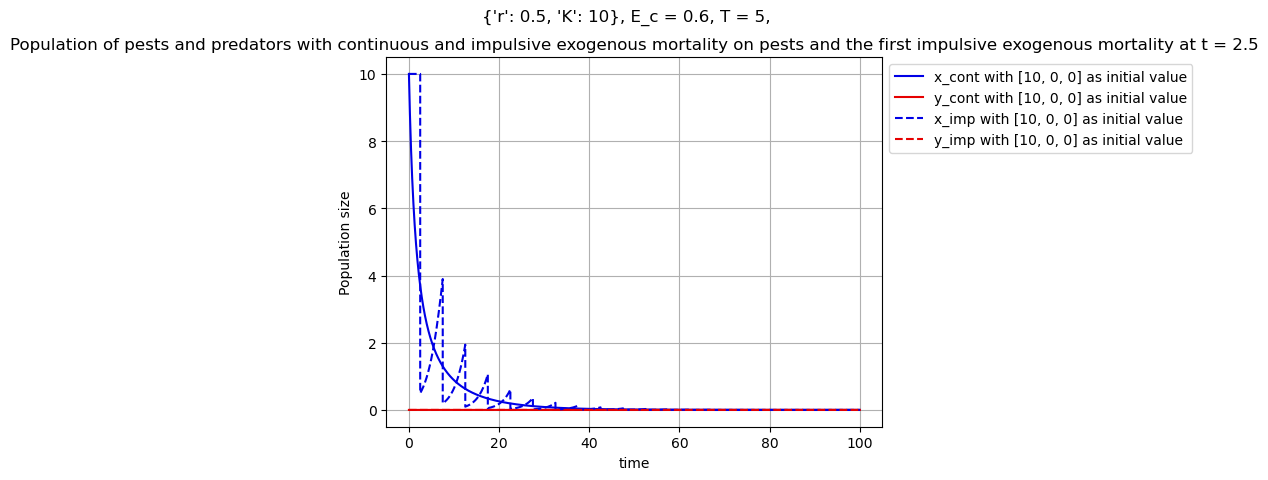

{'T': 5,
 'I_cont_final': 35.83443297660491,
 'I_imp_final': 42.63288423326491,
 'eps': 0.01,
 't_pulse': 2.5,
 't_eta_cont': 51.25,
 't_eta_imp': 62.5,
 't_eta_imp - t_eta_cont': 11.25}

In [7]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp= [K,0,0],
    xyI0_cont= [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=2.5,
    eps=0.01,
    plot_population=True
)

## 1.2 Plot graphs that compares the two models for many values of the parameters

### $t_{\eta}$ for both continuous and impulsive model with respect to $\epsilon$

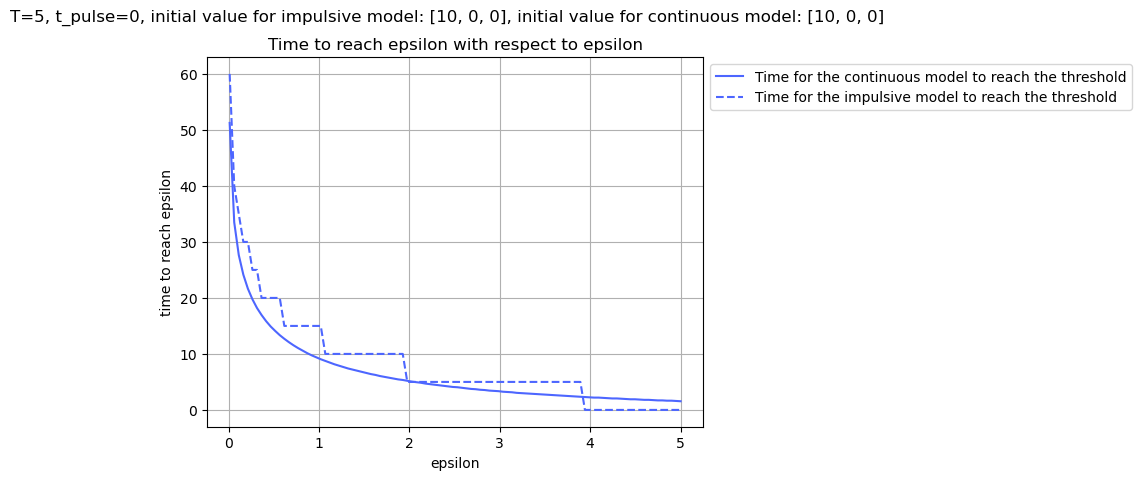

In [8]:
double_exo.plot_t_eta_of_eps_prop_mortality_on_x(
    xyI0_imp= [K,0,0],
    xyI0_cont= [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=0,
    eps_start=0.01,
    eps_stop=5
)

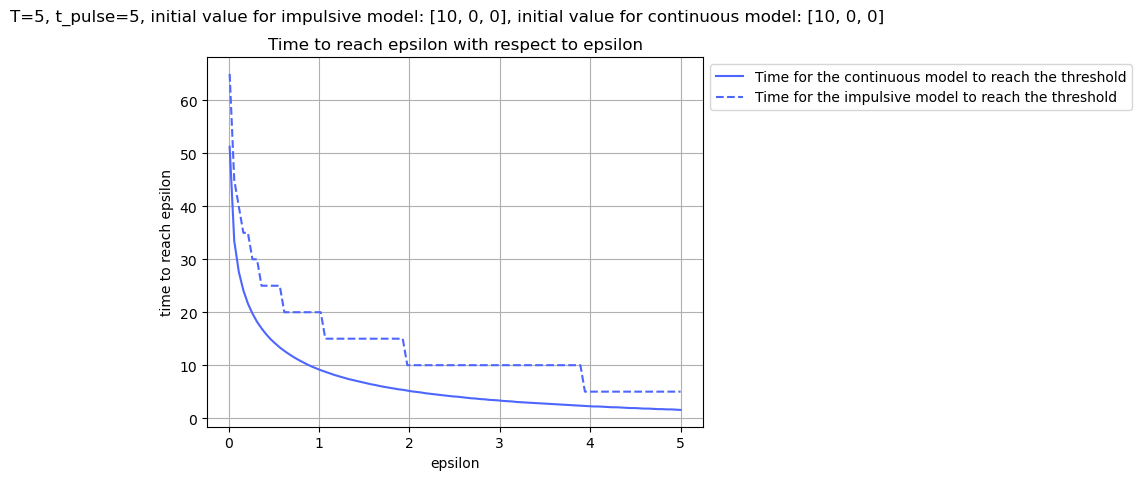

In [9]:
double_exo.plot_t_eta_of_eps_prop_mortality_on_x(
    xyI0_imp= [K,0,0],
    xyI0_cont= [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=T,
    eps_start=0.01,
    eps_stop=5
)

# 2 Presence of both pests $x$ and predators $y$

The "worst possible initial value" is $x_0 = K$ and $y_0$ is vey small, for example $0.1$

In [7]:
#Same initial value
xyI0 = [K, 0.1, 0]

## 2.0 (For the presentation) Plot population with different value of $E_c$

low_E

In [5]:
E_bound = r * ( 1 - m/(K*gamma*a) )
print(E_bound)

0.4375

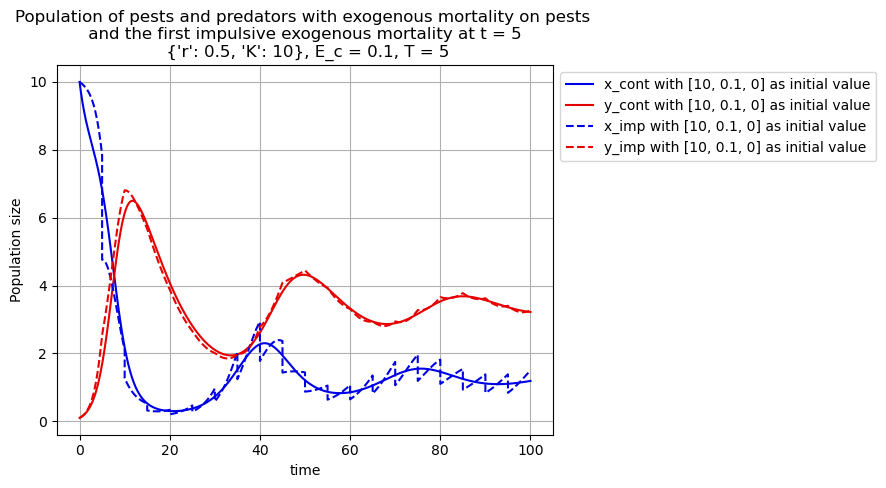

{'T': 5,
 'I_cont_final': 168.40169892695576,
 'I_imp_final': 168.5889178532496,
 'eps': 0.01,
 't_pulse': 5,
 't_eta_cont': None,
 't_eta_imp': None}

In [8]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp = xyI0,
    xyI0_cont = xyI0,
    t=tt,
    gamma=gamma,
    E_c=0.1,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=T,
    eps=0.01,
    plot_population=True
)

mid_E

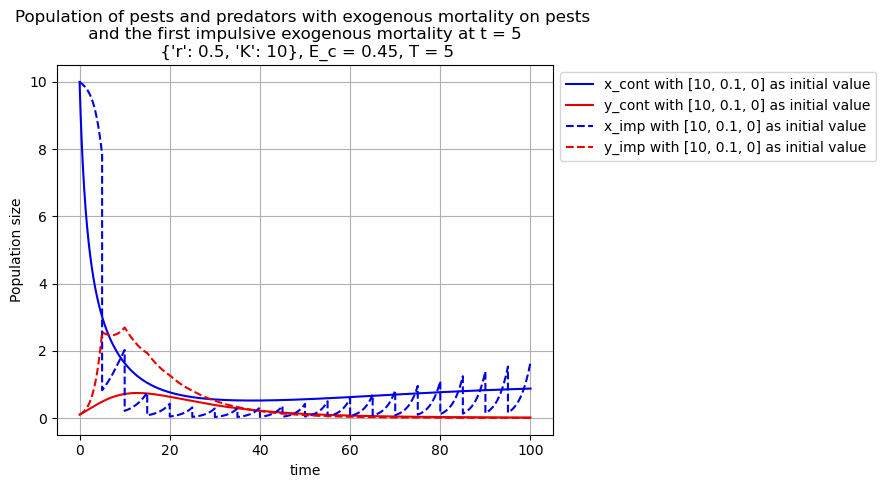

{'T': 5,
 'I_cont_final': 101.38329954367899,
 'I_imp_final': 81.16204676542468,
 'eps': 0.01,
 't_pulse': 5,
 't_eta_cont': None,
 't_eta_imp': None}

In [9]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp = xyI0,
    xyI0_cont = xyI0,
    t=tt,
    gamma=gamma,
    E_c=0.45,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=T,
    eps=0.01,
    plot_population=True
)

high_E

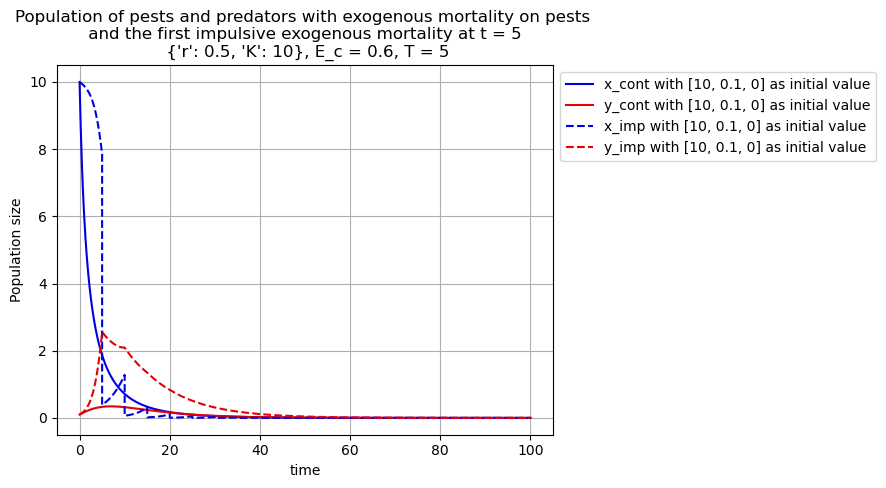

{'T': 5,
 'I_cont_final': 32.233491452521854,
 'I_imp_final': 51.74239973433285,
 'eps': 0.01,
 't_pulse': 5,
 't_eta_cont': 46.25,
 't_eta_imp': 35.0,
 't_eta_imp - t_eta_cont': -11.25}

In [10]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp = xyI0,
    xyI0_cont = xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=T,
    eps=0.01,
    plot_population=True
)

## 2.1 Plot the populations and get the values of the criteria

Time to reach $\epsilon$ starting from the same initial value

To have eradication, we always set $E_c > r$

First exogenous mortality event at $t=T$

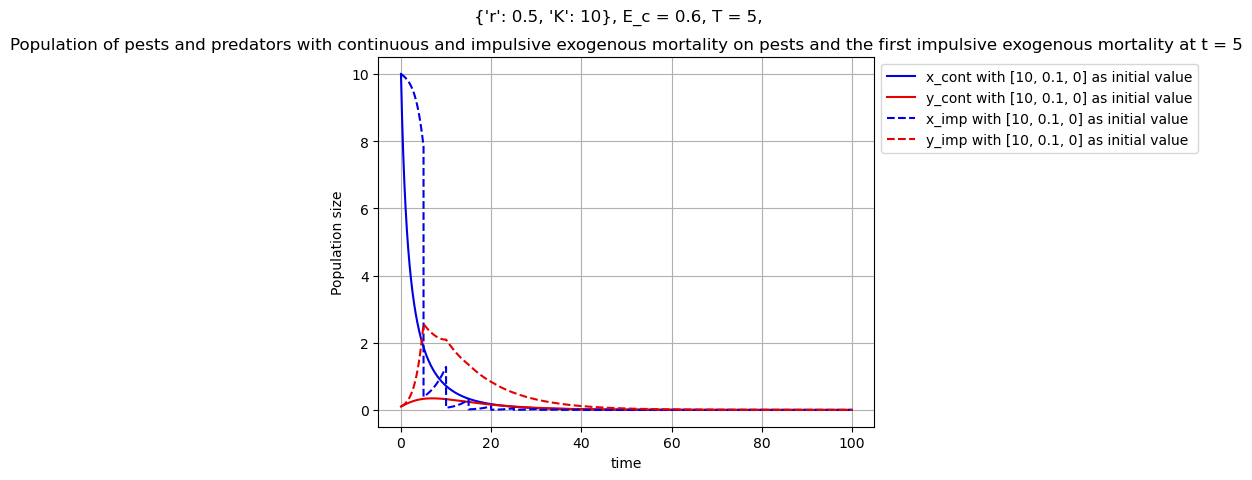

{'T': 5,
 'I_cont_final': 32.233491452521854,
 'I_imp_final': 51.74239973433285,
 'eps': 0.01,
 't_pulse': 5,
 't_eta_cont': 46.25,
 't_eta_imp': 35.0,
 't_eta_imp - t_eta_cont': -11.25}

In [11]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp = xyI0,
    xyI0_cont = xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=T,
    eps=0.01,
    plot_population=True
)

First exogenous mortality event at $t=0$

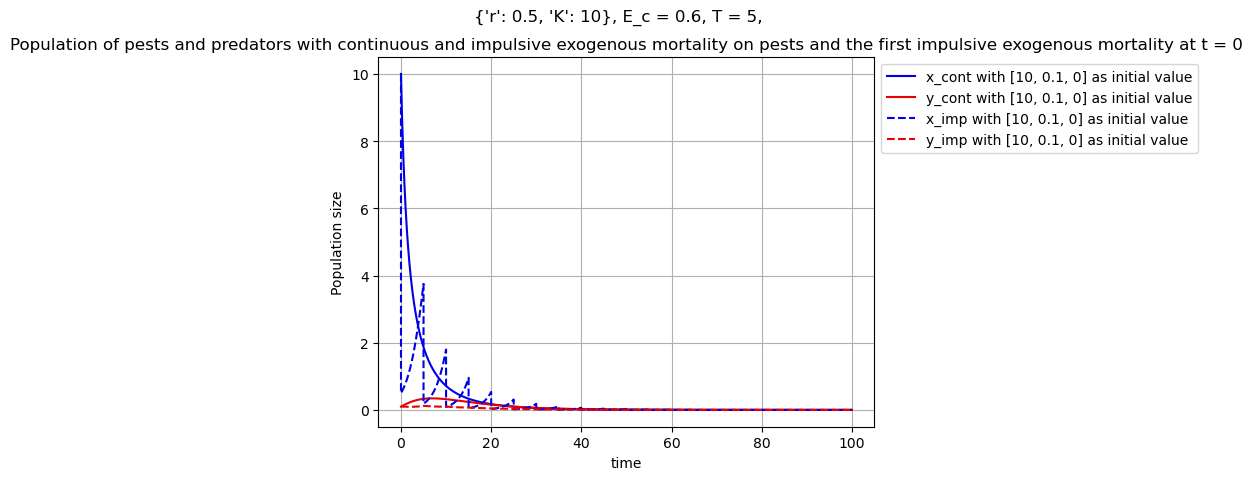

{'T': 5,
 'I_cont_final': 32.233491452521854,
 'I_imp_final': 16.582298948806628,
 'eps': 0.01,
 't_pulse': 0,
 't_eta_cont': 46.25,
 't_eta_imp': 55.0,
 't_eta_imp - t_eta_cont': 8.75}

In [12]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp = xyI0,
    xyI0_cont = xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=0,
    eps=0.01,
    plot_population=True
)

First exogenous mortality event at $t=2.5$ (for example)

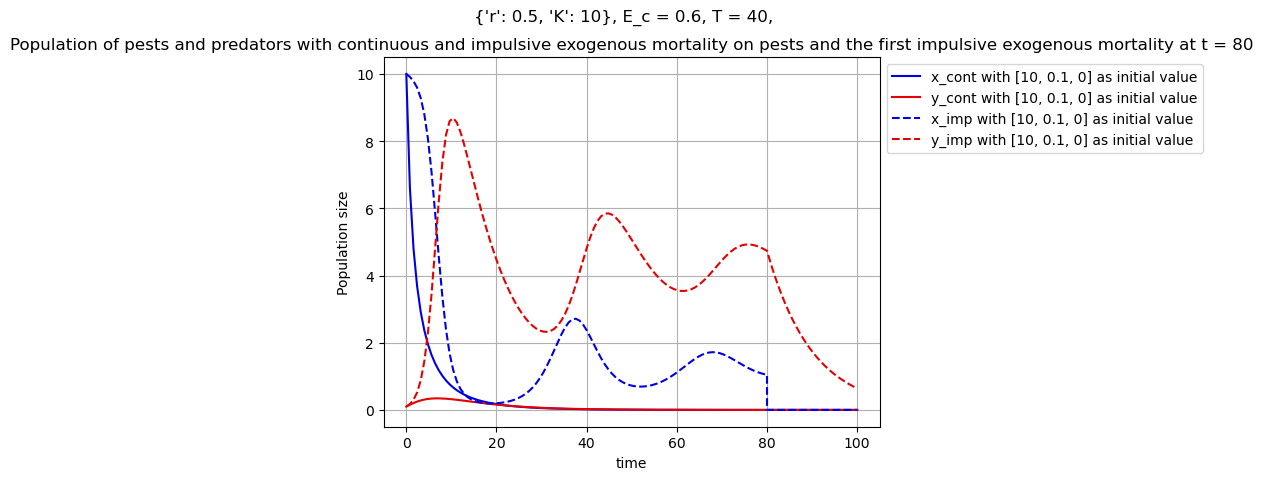

{'T': 40,
 'I_cont_final': np.float64(32.233490799480116),
 'I_imp_final': np.float64(148.22049726957565),
 'eps': 0.01,
 't_pulse': 80,
 't_eta_cont': np.float64(46.400000000000006),
 't_eta_imp': np.float64(80.0),
 't_eta_imp - t_eta_cont': np.float64(33.599999999999994)}

In [7]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp = xyI0,
    xyI0_cont = xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=40,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=80,
    eps=0.01,
    plot_population=True
)

## 2.2 Plot graphs that compares the two models for many values of the parameters

### 2.2.1 $t_{\eta}$ for both continuous and impulsive model with respect to $\epsilon$

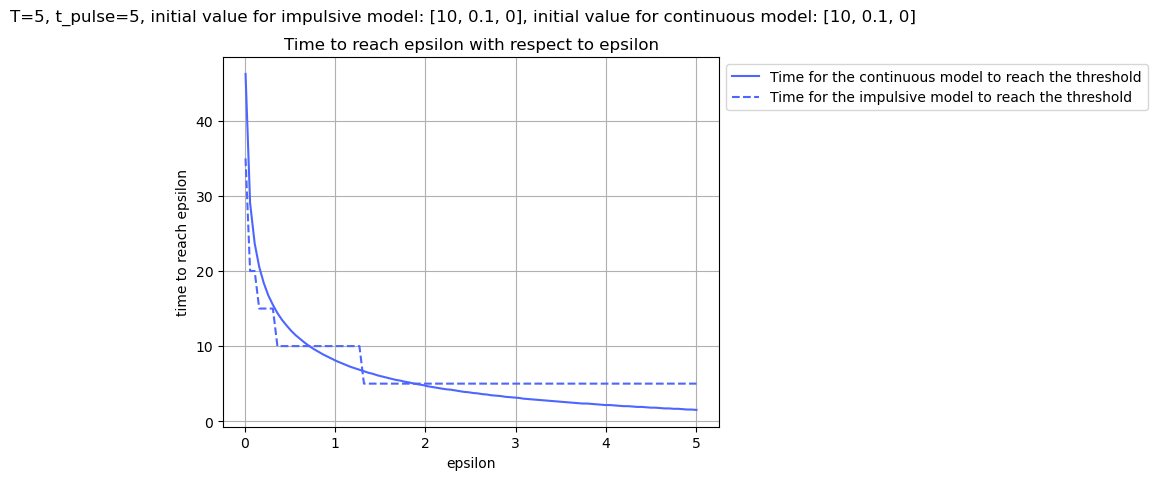

In [14]:
double_exo.plot_t_eta_of_eps_prop_mortality_on_x(
    xyI0_imp= xyI0,
    xyI0_cont= xyI0, #Same initial value
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=T,
    eps_start=0.01,
    eps_stop=5
)

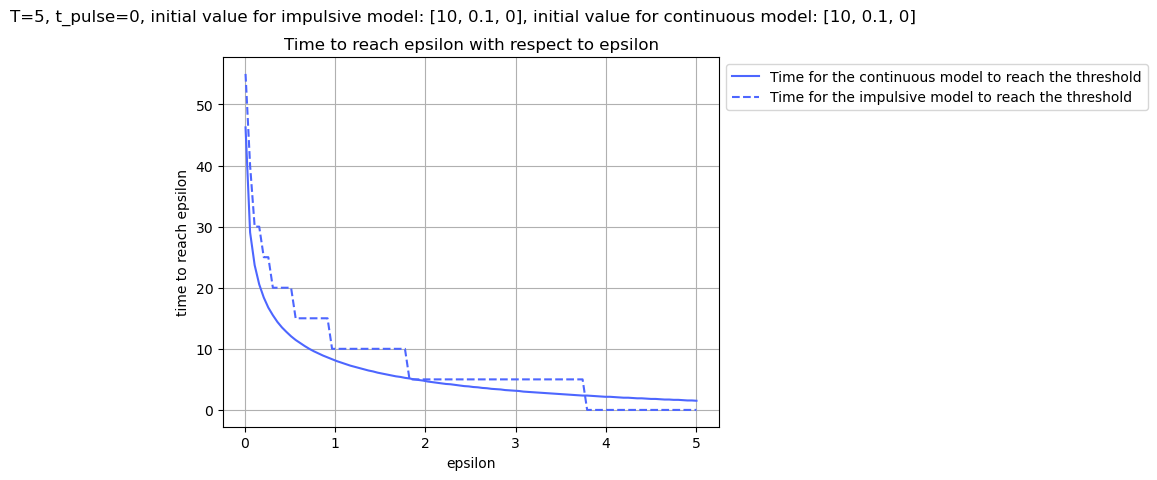

In [15]:
double_exo.plot_t_eta_of_eps_prop_mortality_on_x(
    xyI0_imp= xyI0,
    xyI0_cont= xyI0, #Same initial value
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=0,
    eps_start=0.01,
    eps_stop=5
)

### 2.2.2 Difference between impulsive $t_{\eta}$ and continuous $t_{\eta}$ with respect to $t_{pulse}$

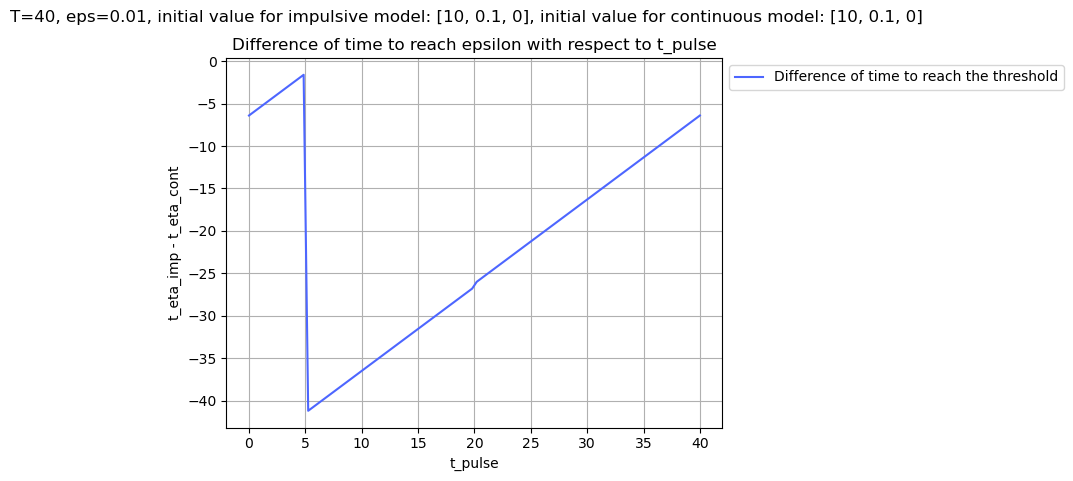

In [5]:
double_exo.plot_diff_t_eta_of_t_pulse_prop_mortality_on_x(
    xyI0_cont=xyI0,
    xyI0_imp=xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=40,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01
)

### 2.2.3 Difference between impulsive $t_{\eta}$ and continuous $t_{\eta}$ model with respect to $T$ and $\frac{t_{pulse}}{T}$

$T$ from $1$ to $50$

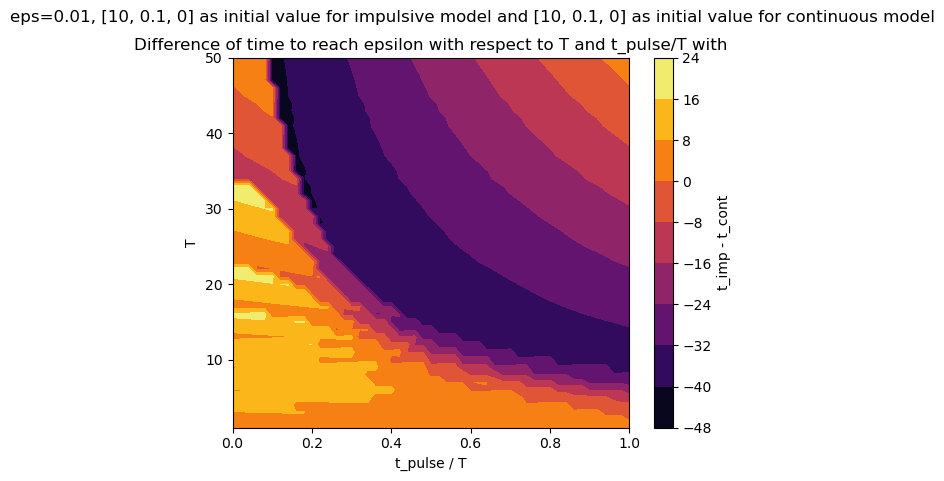

In [31]:
double_exo.plot_t_eta_contour_from_t_pulse_T_prop_mortality_on_x(
    xyI0_imp=xyI0,
    xyI0_cont=xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01,
    T_start=1,
    T_stop=50,
    T_num=50,
    t_pulse_over_T_array_num= 51
)

$T$ from $1$ to $20$

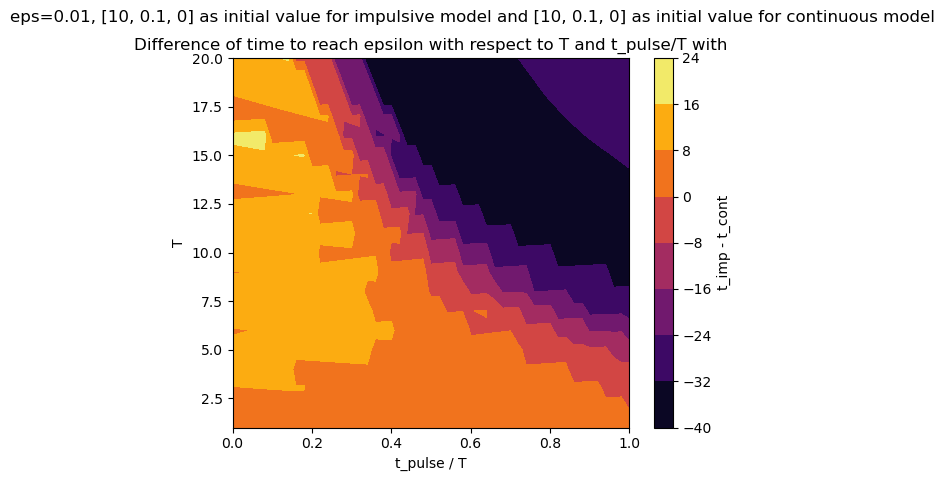

In [32]:
double_exo.plot_t_eta_contour_from_t_pulse_T_prop_mortality_on_x(
    xyI0_imp=xyI0,
    xyI0_cont=xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01,
    T_start=1,
    T_stop=20,
    T_num=20,
    t_pulse_over_T_array_num= 51
)

$T$ from $0.1$ to $5$

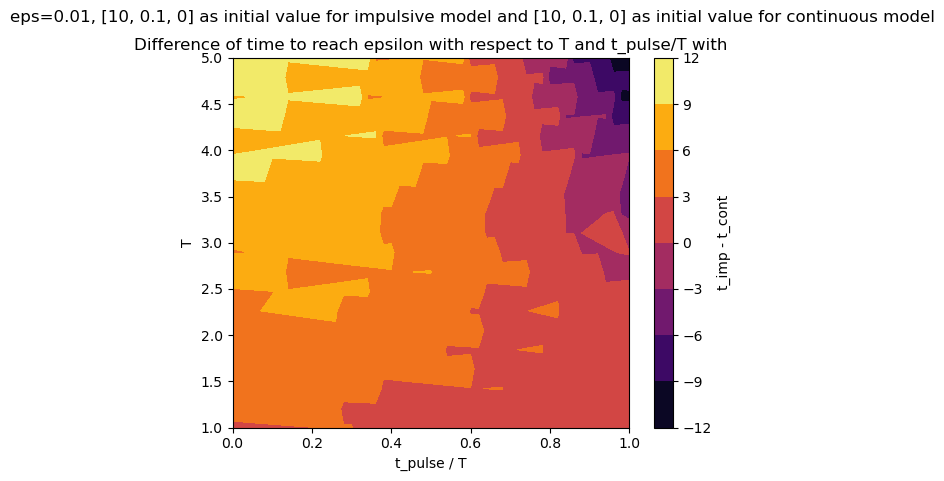

In [39]:
double_exo.plot_t_eta_contour_from_t_pulse_T_prop_mortality_on_x(
    xyI0_imp=xyI0,
    xyI0_cont=xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01,
    T_start=1,
    T_stop=5,
    T_num=20,
    t_pulse_over_T_array_num= 51
)